In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')
mnist.data[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import numpy as np
X,y=mnist["data"], mnist["target"]
y=y.astype(np.int)
print(X.shape,y.shape)

(70000, 784) (70000,)


<ipython-input-2-009f1f88370f>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=y.astype(np.int)


In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [4]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train, y_train=X_train.values[shuffle_index],y_train[shuffle_index]

In [5]:
from scipy.ndimage.interpolation import shift
def shift_image(image,dx,dy):
    image=image.reshape((28,28))
    shifted_image=shift(image,[dy,dx])
    return shifted_image.reshape([-1])

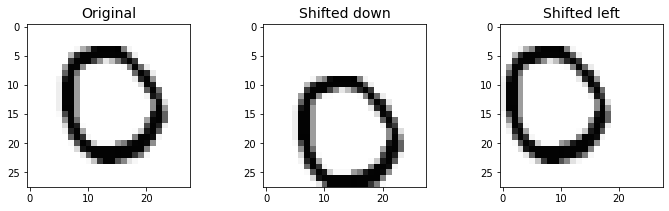

In [6]:
import matplotlib.pyplot as plt

image=X_train[70]
shifted_image_down=shift_image(image,0,5)
shifted_image_left=shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28,28),cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28),cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28,28),cmap="Greys")
plt.show()


In [7]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [8]:
shuffle_idx=np.random.permutation(len(X_train_augmented))
X_train_augmented=X_train_augmented[shuffle_idx]
y_train_augmented=y_train_augmented[shuffle_idx]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=1)

In [12]:
from sklearn.metrics import accuracy_score

y_pred=knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9727